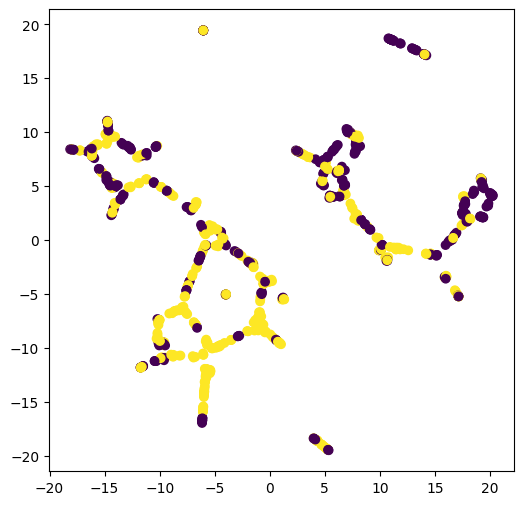

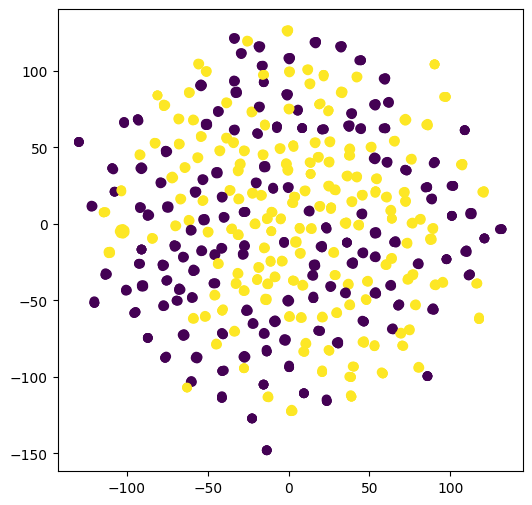

In [6]:
import pacmap as pm
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('data/heart.csv')

def pacmap(df):

    # create pacmap object
    pac = pm.PaCMAP()

    # fit pacmap
    reduced = pac.fit_transform(df.to_numpy(), init="pca")

    # plot
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(reduced[:, 0], reduced[:, 1], c=df.target)#, cmap="Spectral")

    # color by target
    #ax.scatter(reduced[:, 0], reduced[:, 1], c=df.target, cmap="Spectral")


pacmap(df)

from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, 
    learning_rate='auto', init='random', perplexity=3).fit_transform(df.to_numpy())

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df.target)#, cmap="Spectral")


In [32]:
import numpy as np
d = df.to_numpy()
a = np.array([False for i in range(14)])
b = np.array([[i for i in range(14)]])
#b[:,a]
a.shape
#d.reshape(1,-1)[:,a]

# table d with column by boolean mask a
d[:,a]

array([], shape=(1025, 0), dtype=float64)

In [ ]:
import pacmap
import numpy as np
import matplotlib.pyplot as plt

# loading preprocessed coil_20 dataset
# you can change it with any dataset that is in the ndarray format, with the shape (N, D)
# where N is the number of samples and D is the dimension of each sample
X = np.load("./data/coil_20.npy", allow_pickle=True)
X = X.reshape(X.shape[0], -1)
y = np.load("./data/coil_20_labels.npy", allow_pickle=True)

# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_dims=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X, init="pca")

# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap="Spectral", c=y, s=0.6)